## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.linspace(0,20,200)
x_data = np.c_[np.ones(x.shape[0]), x]
# x

In [3]:
y = -2*x +1
# y

#### Plot your data points. 

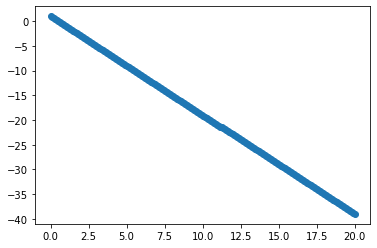

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:
def gradient(x,y,alpha=0.01,iterations=1000):
    theta  = [0,0]
    losses = []
    thetas=[]
    for i in range(iterations):
        pred = np.dot(x,theta)
        error = pred-y
        losses.append( 1/(2*len(x)) * np.dot(error.T, error))
        thetas.append(theta)
        theta -= (alpha * (1/len(x)) * np.dot(x.T, error)) 
    return thetas,losses

## Loss vs epochs 100 epochs

In [6]:
thetas,losses = gradient(x_data,y,alpha=0.01,iterations=100)

In [7]:
from sklearn.metrics import r2_score
y_pred = np.dot(x_data,thetas[-1].T)

In [8]:
r2_score(y, y_pred)

0.9985190479195466

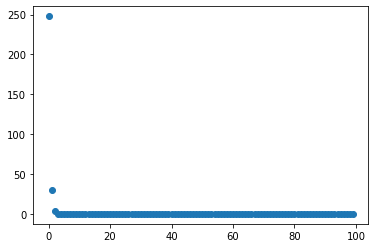

In [9]:
x_axis = np.arange(len(losses))
plt.scatter(x_axis,losses)

In [10]:
_thetas= np.array(thetas)
print(_thetas[-1,0])
print(_thetas[-1,1])

0.11015880859217829
-1.9333041957063155


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

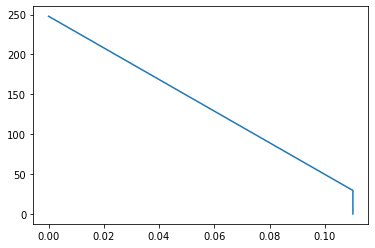

In [11]:
#theta0 vs loss
plt.plot(_thetas[:,0],losses)

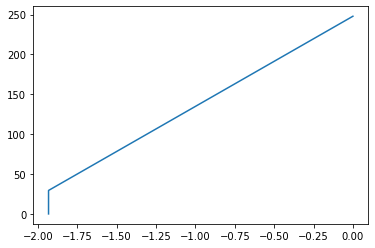

In [12]:
#theta1 vs loss
plt.plot(_thetas[:,1],losses)

## Loss vs epochs 500 epochs

In [13]:
thetas,losses = gradient(x_data,y,alpha=0.01,iterations=500)

In [14]:
from sklearn.metrics import r2_score
y_pred = np.dot(x_data,thetas[-1].T)

In [15]:
r2_score(y, y_pred)

0.9998008366856256

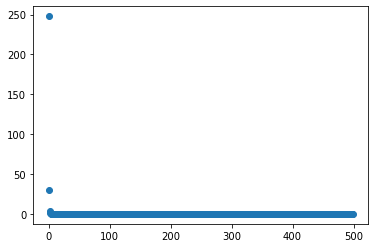

In [16]:
x_axis = np.arange(len(losses))
plt.scatter(x_axis,losses)

In [17]:
_thetas= np.array(thetas)
print(_thetas[-1,0])
print(_thetas[-1,1])

0.6736777587909483
-1.9755413386719916


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

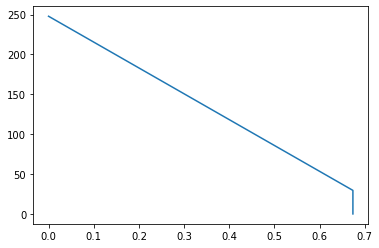

In [18]:
#theta0 vs loss
plt.plot(_thetas[:,0],losses)

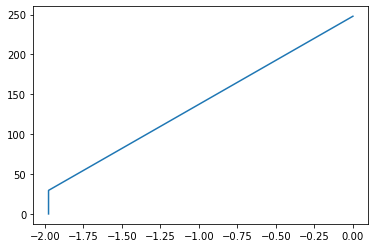

In [19]:
#theta1 vs loss
plt.plot(_thetas[:,1],losses)

## Loss vs epochs 1000 epochs

In [20]:
thetas,losses = gradient(x_data,y,alpha=0.01,iterations=1000)

In [21]:
from sklearn.metrics import r2_score
y_pred = np.dot(x_data,thetas[-1].T)

In [22]:
r2_score(y, y_pred)

0.9999837802271262

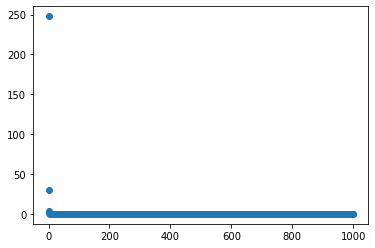

In [23]:
x_axis = np.arange(len(losses))
plt.scatter(x_axis,losses)

In [24]:
_thetas= np.array(thetas)
print(_thetas[-1,0])
print(_thetas[-1,1])

0.9068754071801092
-1.9930200807991165


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

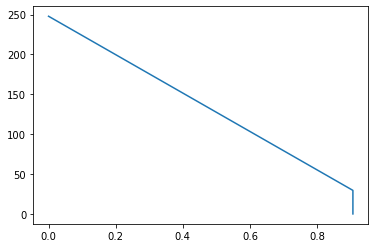

In [25]:
#theta0 vs loss
plt.plot(_thetas[:,0],losses)

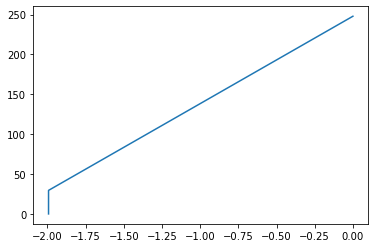

In [26]:
#theta1 vs loss
plt.plot(_thetas[:,1],losses)

## Best Fit Plot

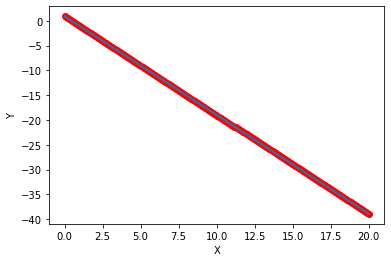

In [27]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(x, y_pred, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
x_line = x#np.linspace(0, 5, 20)
y_line = thetas[-1][1]*x_line + thetas[-1][0]
line.set_data(x_line, y_line)
plt.show()

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

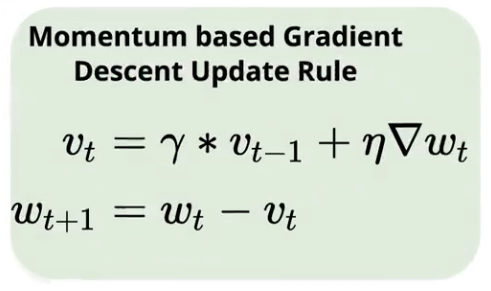

#### γ takes values between 0 and 1.
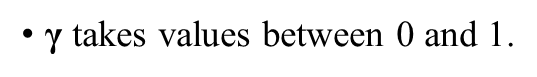

In [28]:
def momentum_gradient(x,y,learning_rate=0.01,gamma=0.9,iterations=100):
    theta  = np.zeros(2)#[0,0]
    losses = []
    thetas= []
    v=np.zeros(2)
    for i in range(iterations):
        pred = np.dot(x,theta)
        error = pred-y
        losses.append( 1/(2*len(x)) * np.dot(error.T, error))
        thetas.append(theta)
        gradient = (learning_rate * (1/len(x)) * np.dot(x.T, error)) 
        v = v * gamma + gradient
        theta = theta - v
    return thetas,losses

In [29]:
thetas,losses = momentum_gradient(x_data,y)

In [30]:
from sklearn.metrics import r2_score
y_pred = np.dot(x_data,thetas[-1].T)

In [31]:
r2_score(y, y_pred)

0.9999506505676036

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

## Momentum = 0

In [32]:
thetas,losses = momentum_gradient(x_data,y,learning_rate=0.01,gamma=0.0,iterations=100)

In [33]:
from sklearn.metrics import r2_score
y_pred = np.dot(x_data,thetas[-1].T)

In [34]:
r2_score(y, y_pred)

0.9985116011173453

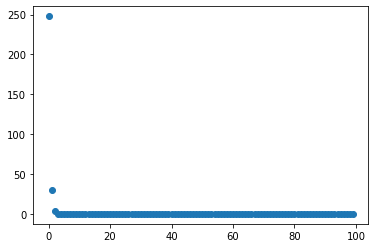

In [35]:
x_axis = np.arange(len(losses))
plt.scatter(x_axis,losses)

In [36]:
_thetas= np.array(thetas)
print(_thetas[-1,0])
print(_thetas[-1,1])

0.10792438041908117
-1.9331367197728793


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

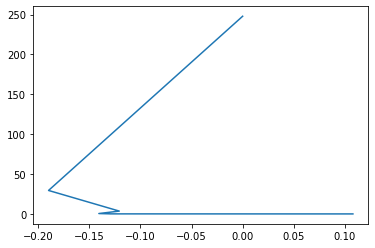

In [37]:
#theta0 vs loss
plt.plot(_thetas[:,0],losses)

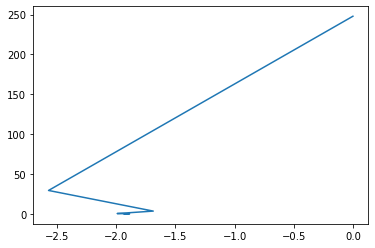

In [38]:
#theta1 vs loss
plt.plot(_thetas[:,1],losses)

## Momentum = 0.5

In [39]:
thetas,losses = momentum_gradient(x_data,y,learning_rate=0.01,gamma=0.5,iterations=100)

In [40]:
from sklearn.metrics import r2_score
y_pred = np.dot(x_data,thetas[-1].T)

In [41]:
r2_score(y, y_pred)

0.9990905641364694

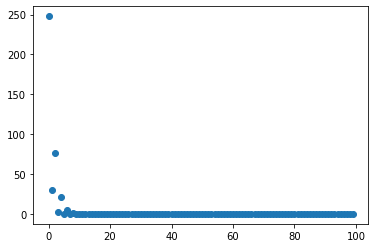

In [42]:
x_axis = np.arange(len(losses))
plt.scatter(x_axis,losses)

In [43]:
_thetas= np.array(thetas)
print(_thetas[-1,0])
print(_thetas[-1,1])

0.3026865519279412
-1.9477346275795684


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

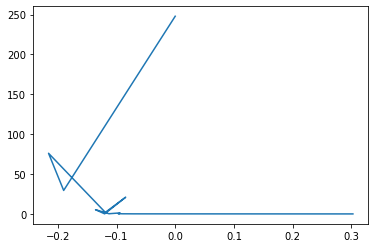

In [44]:
#theta0 vs loss
plt.plot(_thetas[:,0],losses)

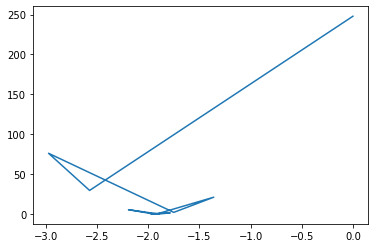

In [45]:
#theta1 vs loss
plt.plot(_thetas[:,1],losses)

## Momentum = 0.9

In [46]:
thetas,losses = momentum_gradient(x_data,y,learning_rate=0.01,gamma=0.9,iterations=100)

In [47]:
from sklearn.metrics import r2_score
y_pred = np.dot(x_data,thetas[-1].T)

In [48]:
r2_score(y, y_pred)

0.9999506505676036

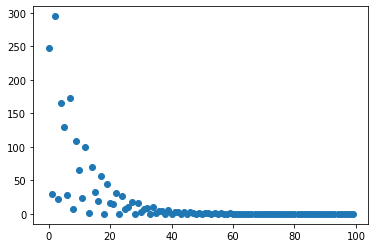

In [49]:
x_axis = np.arange(len(losses))
plt.scatter(x_axis,losses)

In [50]:
_thetas= np.array(thetas)
print(_thetas[-1,0])
print(_thetas[-1,1])

0.9506014267637164
-1.989587084816045


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

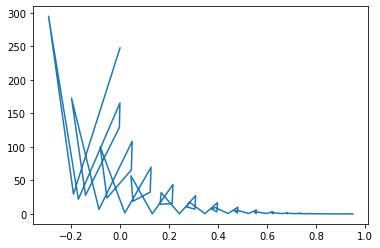

In [51]:
#theta0 vs loss
plt.plot(_thetas[:,0],losses)

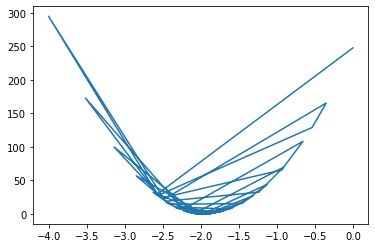

In [52]:
#theta1 vs loss
plt.plot(_thetas[:,1],losses)

### Update your Batch GD for one variable  implementation to be NAG and check your results

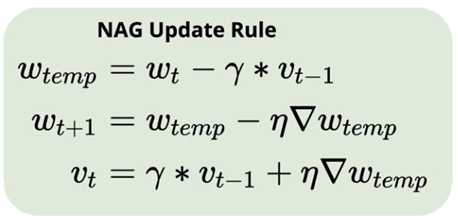

In [53]:
def nag_gradient(x,y,learning_rate=0.01,gamma=0.8,iterations=100):
    theta  = np.zeros(2)
    losses = []
    thetas= []
    vt = np.zeros(2)
    for i in range(iterations):
        
        theta_temp = theta- gamma*vt
        temp_pred = np.dot(x,theta_temp)
        error_temp = temp_pred-y
        
        theta_temp_gradient = (1/len(x)) * np.dot(x.T, error_temp)
        theta = theta_temp-theta_temp_gradient * learning_rate 
        vt = gamma*vt + theta_temp_gradient * learning_rate 
        thetas.append(theta)
        pred = np.dot(x,theta)
        error = pred-y
        losses.append( 1/(2*len(x)) * np.dot(error.T, error))
    return thetas,losses

In [54]:
thetas,losses = nag_gradient(x_data,y)
# thetas

In [55]:
r2_score(y, y_pred)
y_pred = np.dot(x_data,thetas[-1].T)
r2_score(y, y_pred)
#theta0
# theta1 temop
# temp_y = sum(theta0temp+theta1temp*x)
# gradient = y-temp_y

0.9998029837933529

## Momentum = 0.1

In [56]:
thetas,losses = nag_gradient(x_data,y,learning_rate=0.01,gamma=0.1,iterations=100)

In [57]:
from sklearn.metrics import r2_score
y_pred = np.dot(x_data,thetas[-1].T)

In [58]:
r2_score(y, y_pred)

0.9985985889144465

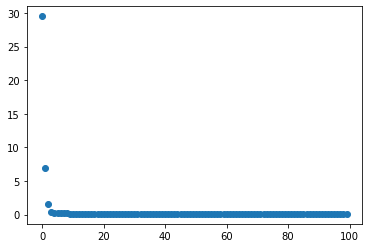

In [59]:
x_axis = np.arange(len(losses))
plt.scatter(x_axis,losses)

In [60]:
_thetas= np.array(thetas)
print(_thetas[-1,0])
print(_thetas[-1,1])

0.134384993440373
-1.9351200083468403


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

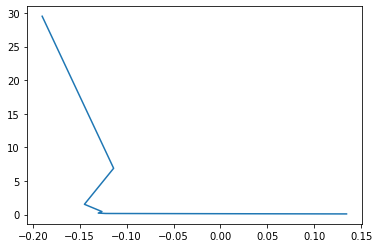

In [61]:
#theta0 vs loss
plt.plot(_thetas[:,0],losses)

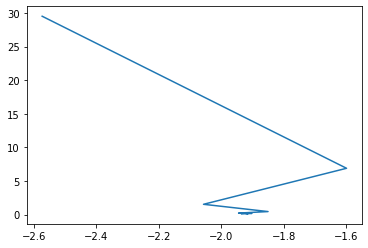

In [62]:
#theta1 vs loss
plt.plot(_thetas[:,1],losses)

0.10792438041908117
-1.9331367197728793


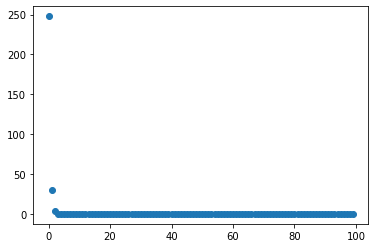

In [63]:
## Momentum = 0

thetas,losses = momentum_gradient(x_data,y,learning_rate=0.01,gamma=0.0,iterations=100)

from sklearn.metrics import r2_score
y_pred = np.dot(x_data,thetas[-1].T)

r2_score(y, y_pred)

x_axis = np.arange(len(losses))
plt.scatter(x_axis,losses)

_thetas= np.array(thetas)
print(_thetas[-1,0])
print(_thetas[-1,1])
#theta1 vs loss

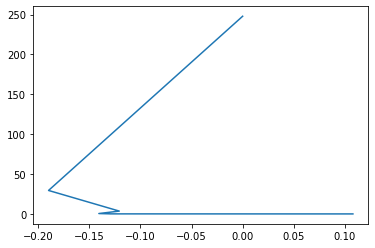

In [64]:
#theta0 vs loss
plt.plot(_thetas[:,0],losses)

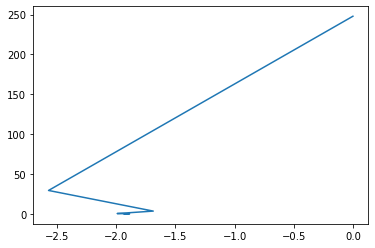

In [65]:
#theta0 vs loss
plt.plot(_thetas[:,1],losses)

## Momentum = 0.5

In [66]:
thetas,losses = nag_gradient(x_data,y,learning_rate=0.01,gamma=0.5,iterations=100)

In [67]:
from sklearn.metrics import r2_score
y_pred = np.dot(x_data,thetas[-1].T)

In [68]:
r2_score(y, y_pred)

0.9990974550387989

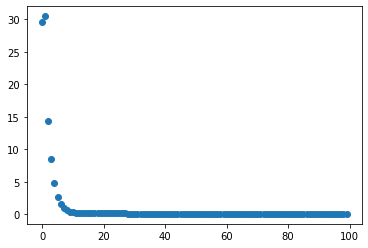

In [69]:
x_axis = np.arange(len(losses))
plt.scatter(x_axis,losses)

In [70]:
_thetas= np.array(thetas)
print(_thetas[-1,0])
print(_thetas[-1,1])

0.30533338824855993
-1.9479330145262903


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

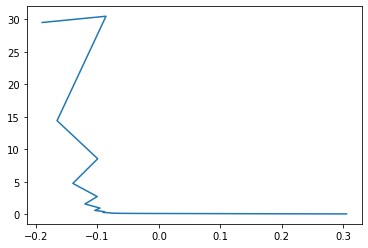

In [71]:
#theta0 vs loss
plt.plot(_thetas[:,0],losses)

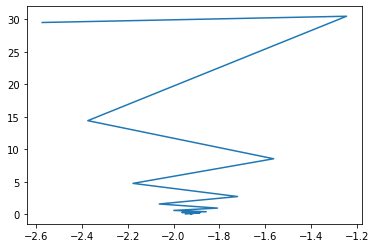

In [72]:
#theta1 vs loss
plt.plot(_thetas[:,1],losses)

## Momentum = 0.9

In [73]:
thetas,losses = nag_gradient(x_data,y,learning_rate=0.01,gamma=0.9,iterations=100)

In [74]:
y_pred = np.dot(x_data,thetas[-1].T)

In [75]:
r2_score(y, y_pred)

0.9963499920169039

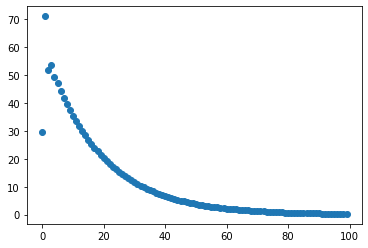

In [76]:
x_axis = np.arange(len(losses))
plt.scatter(x_axis,losses)

In [77]:
_thetas= np.array(thetas)
print(_thetas[-1,0])
print(_thetas[-1,1])

0.9495087499048349
-1.9356202731973964


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

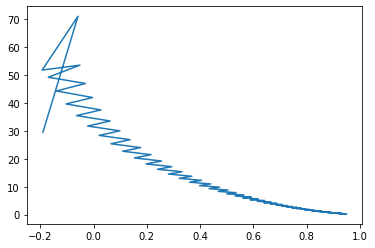

In [78]:
#theta0 vs loss
plt.plot(_thetas[:,0],losses)

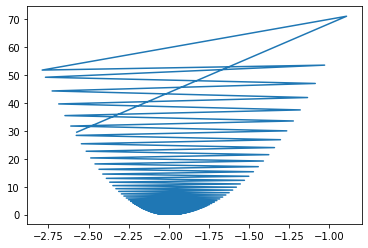

In [79]:
#theta1 vs loss
plt.plot(_thetas[:,1],losses)

### Momentum = 0

0.10792438041908117
-1.9331367197728793


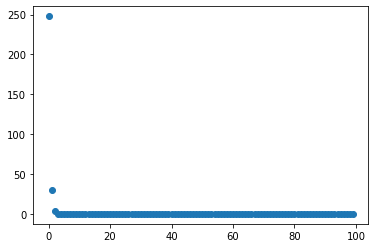

In [80]:
## Momentum = 0

thetas,losses = momentum_gradient(x_data,y,learning_rate=0.01,gamma=0.0,iterations=100)

from sklearn.metrics import r2_score
y_pred = np.dot(x_data,thetas[-1].T)

r2_score(y, y_pred)

x_axis = np.arange(len(losses))
plt.scatter(x_axis,losses)

_thetas= np.array(thetas)
print(_thetas[-1,0])
print(_thetas[-1,1])

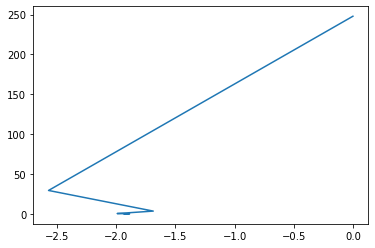

In [81]:
#theta1 vs loss
plt.plot(_thetas[:,1],losses)

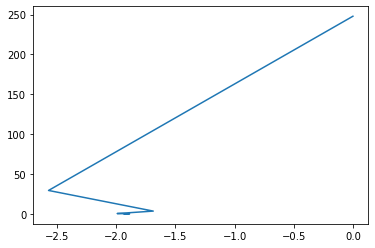

In [82]:
#theta1 vs loss
plt.plot(_thetas[:,1],losses)

## Congratulations 
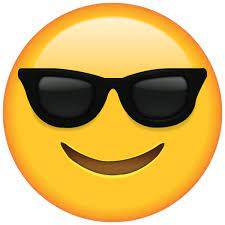